# Basic script to plot the necessary data distributions in PUPPIML dataset
- Datasets are downloaded from https://zenodo.org/communities/mpp-hep/search?page=1&size=20&q=puppiml

- The original paper: https://arxiv.org/pdf/1810.07988.pdf

- The orignal code: https://github.com/vlimant/PUPPIML/blob/master/PUPPIML.ipynb

### An explanation of the dataset

- Keys ['Particles', 'Particles_Names', 'evtFeatures', 'evtFeatures_Names']

- Particle features: [b'Px', b'Py', b'Pz', b'Energy', b'Pt', b'Eta', b'Phi', b'Charge', b'alphaAll_1', b'alphaAll_2', b'alphaAll_3', b'alphaCh_1', b'alphaCh_2', b'alphaCh_3', b'alphaNeu_1', b'alphaNeu_2', b'alphaNeu_3', b'isPU', b'isNu']

- Event features: [b'rho', b'rho_charged', b'rho_neutral']

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
hep.set_style(hep.style.CMS)

In [8]:
filepath = "../../ZnunuPlusJet_13TeV_80PU_withUnderlyingEvent/ZnunuPlusJet_13TeV_80PU_withUnderlyingEvent_0.h5"
events = h5py.File(filepath,"r")

print particle and event feature names

In [34]:
particle_feature_names = np.array(events['Particles_Names'])
for idx in range(particle_feature_names.shape[0]):
    print("Index {idx:3d}: Feature {name}".format(idx=idx, name=particle_feature_names[idx]))
#print("event feature names: ", np.array(events['evtFeatures_Names']))

Index   0: Feature b'Px'
Index   1: Feature b'Py'
Index   2: Feature b'Pz'
Index   3: Feature b'Energy'
Index   4: Feature b'Pt'
Index   5: Feature b'Eta'
Index   6: Feature b'Phi'
Index   7: Feature b'Charge'
Index   8: Feature b'alphaAll_1'
Index   9: Feature b'alphaAll_2'
Index  10: Feature b'alphaAll_3'
Index  11: Feature b'alphaCh_1'
Index  12: Feature b'alphaCh_2'
Index  13: Feature b'alphaCh_3'
Index  14: Feature b'alphaNeu_1'
Index  15: Feature b'alphaNeu_2'
Index  16: Feature b'alphaNeu_3'
Index  17: Feature b'isPU'
Index  18: Feature b'isNu'


In [29]:
#Get the list of all particles
particles = np.array(events['Particles'])

In [36]:
print(particles[0,:,17])
np.count_nonzero((particles[:,:,4]>0) ,axis=1)

[0. 0. 0. ... 0. 0. 0.]


array([ 9939,  8129, 11361,  6119,  9294,  8976,  7072,  8347,  5481,
        7178,  7371,  7671,  8234,  8693,  8945,  6186,  9291,  8814,
        6547,  8214,  5080,  8295,  8843,  9728,  9761,  9788,  6767,
        8576,  6743,  8494,  6087,  6712,  8302,  7725,  7394,  7684,
        9269,  9599,  7284,  8862,  5846,  7016,  5556,  6772,  7663,
        7151,  6833,  8968,  7140,  8904,  5143, 10317,  6911,  4580,
        6797,  6613,  7701,  8689,  7685,  5459,  5211,  9063,  9727,
        7343,  7174,  6119,  7817,  7632,  6421,  8403,  7062,  6781,
        5920,  8657,  9764,  7593,  6049,  7882,  8063,  9663,  7711,
        6845,  8531,  5810,  9103,  7156,  5481,  8124,  8547,  7931,
        7304,  7237,  6118,  6780,  6735,  7172,  7278,  6896,  8441,
        6016])

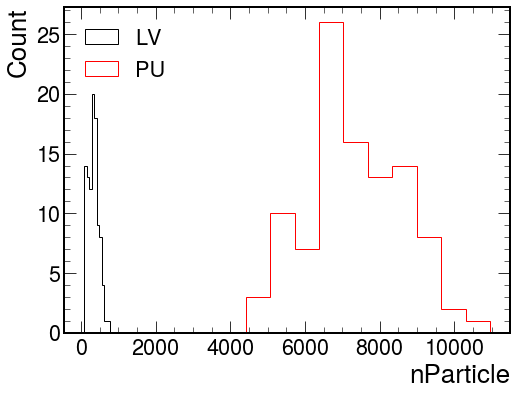

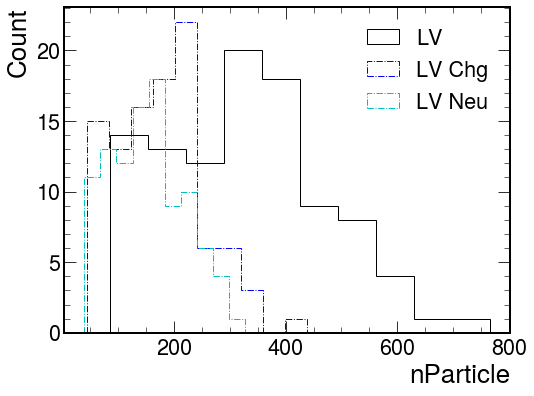

In [42]:
nLV = np.count_nonzero((particles[:,:,4]>0) & (particles[:,:,17]==0), axis=1)
nPU = np.count_nonzero((particles[:,:,4]>0) & (particles[:,:,17]!=0), axis=1)
nLV_chg = np.count_nonzero((particles[:,:,4]>0) & (particles[:,:,17]==0) & (particles[:,:,7]!=0), axis=1)
nLV_neu = np.count_nonzero((particles[:,:,4]>0) & (particles[:,:,17]==0) & (particles[:,:,7]==0), axis=1)
nPU_chg = np.count_nonzero((particles[:,:,4]>0) & (particles[:,:,17]!=0) & (particles[:,:,7]!=0), axis=1)
nPU_neu = np.count_nonzero((particles[:,:,4]>0) & (particles[:,:,17]!=0) & (particles[:,:,7]==0), axis=1)

plt.figure(figsize=(8,6))
plt.hist(nLV, histtype='step', color='black', label='LV')
#plt.hist(nLV_chg, histtype='step', color='b', label='LV Chg', ls='-.')
#plt.hist(nLV_neu, histtype='step', color='c', label='LV Neu', ls='-.')
plt.hist(nPU, histtype='step', color='red',   label='PU')
#plt.hist(nPU_chg, histtype='step', color='darkorange', label='LV Chg', ls='-.')
#plt.hist(nPU_neu, histtype='step', color='magenta', label='LV Neu', ls='-.')
plt.xlabel('nParticle')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.hist(nLV,     histtype='step', color='black', label='LV')
plt.hist(nLV_chg, histtype='step', color='b', label='LV Chg', ls='-.')
plt.hist(nLV_neu, histtype='step', color='c', label='LV Neu', ls='-.')
#plt.hist(nPU, histtype='step', color='red',   label='PU')
#plt.hist(nPU_chg, histtype='step', color='darkorange', label='LV Chg', ls='-.')
#plt.hist(nPU_neu, histtype='step', color='magenta', label='LV Neu', ls='-.')
plt.xlabel('nParticle')
plt.ylabel('Count')
plt.legend()
plt.show()

In [45]:
PLV =     particles[(particles[:,:,4]>0) & (particles[:,:,17]==0)]
PPU =     particles[(particles[:,:,4]>0) & (particles[:,:,17]!=0)]
PLV_chg = particles[((particles[:,:,4]>0) & (particles[:,:,17]==0) & (particles[:,:,7]!=0))]
PLV_neu = particles[((particles[:,:,4]>0) & (particles[:,:,17]==0) & (particles[:,:,7]==0))]
PPU_chg = particles[((particles[:,:,4]>0) & (particles[:,:,17]!=0) & (particles[:,:,7]!=0))]
PPU_neu = particles[((particles[:,:,4]>0) & (particles[:,:,17]!=0) & (particles[:,:,7]==0))]

Plot the pt distributions of charged and neutral particles from leading vertex and pileup

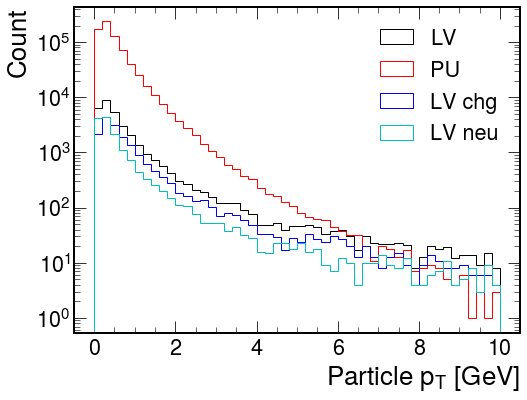

In [52]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,4], bins=50, range=(0,10), histtype='step', color='black', label='LV')
plt.hist(PPU[:,4], bins=50, range=(0,10), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,4], bins=50, range=(0,10), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,4], bins=50, range=(0,10), histtype='step', color='c',   label='LV neu')
#plt.hist(PPU_chg[:,0], bins=50, range=(0,200), histtype='step', color='black', label='LV chg')
#plt.hist(PPU_neu[:,0], bins=50, range=(0,200), histtype='step', color='red',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle $p_{T}$ [GeV]')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot the eta distribution of charged and neutral particles from LV and pileup

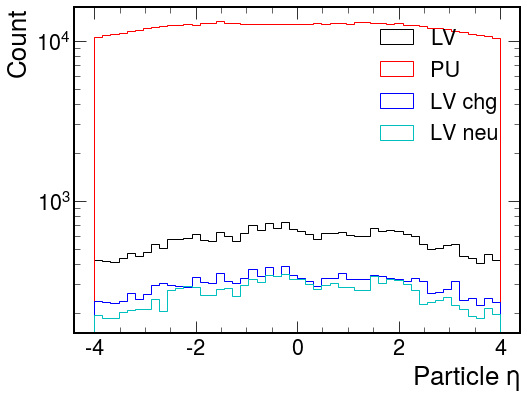

In [54]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,5], bins=50, range=(-4,4), histtype='step', color='black', label='LV')
plt.hist(PPU[:,5], bins=50, range=(-4,4), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,5], bins=50, range=(-4,4), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,5], bins=50, range=(-4,4), histtype='step', color='c',   label='LV neu')
#plt.hist(PPU_chg[:,5], bins=50, range=(0,200), histtype='step', color='black', label='LV chg')
#plt.hist(PPU_neu[:,5], bins=50, range=(0,200), histtype='step', color='red',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle $\eta$')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot the phi distribution of charged and neutral particles from LV and pileup

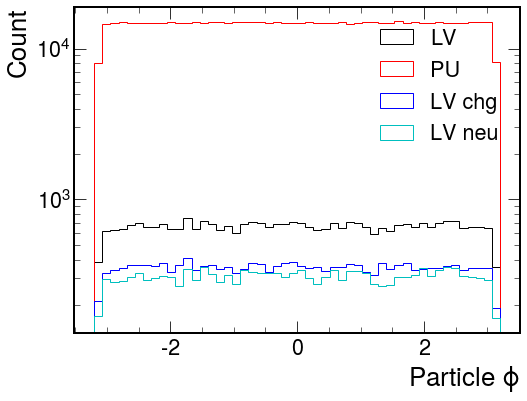

In [57]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,6], bins=50, range=(-3.2,3.2), histtype='step', color='black', label='LV')
plt.hist(PPU[:,6], bins=50, range=(-3.2,3.2), histtype='step', color='red',   label='PU')
plt.hist(PLV_chg[:,6], bins=50, range=(-3.2, 3.2), histtype='step', color='b', label='LV chg')
plt.hist(PLV_neu[:,6], bins=50, range=(-3.2, 3.2), histtype='step', color='c',   label='LV neu')
#plt.hist(PPU_chg[:,6], bins=50, range=(0,200), histtype='step', color='black', label='LV chg')
#plt.hist(PPU_neu[:,6], bins=50, range=(0,200), histtype='step', color='red',   label='PU neu')
plt.yscale('log')
plt.xlabel(r'Particle $\phi$')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot the PUPPI weights of charged and neutral particles from LV and pileup

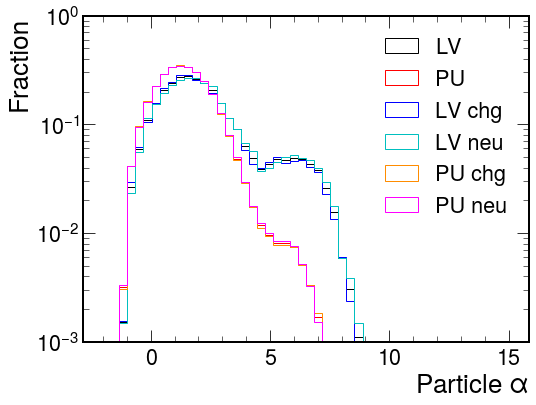

In [68]:
plt.figure(figsize=(8,6))
plt.hist(PLV[:,11], bins=50, range=(-2,15), histtype='step', color='black', label='LV', density=1)
plt.hist(PPU[:,11], bins=50, range=(-2,15), histtype='step', color='red',   label='PU', density=1)
plt.hist(PLV_chg[:,11], bins=50, range=(-2,15), histtype='step', color='b', label='LV chg', density=1)
plt.hist(PLV_neu[:,11], bins=50, range=(-2,15), histtype='step', color='c',   label='LV neu', density=1)
plt.hist(PPU_chg[:,11], bins=50, range=(-2,15), histtype='step', color='darkorange', label='PU chg', density=1)
plt.hist(PPU_neu[:,11], bins=50, range=(-2,15), histtype='step', color='magenta',   label='PU neu', density=1)
plt.yscale('log')
plt.ylim(1e-3,1)
plt.xlabel(r'Particle $\alpha$')
plt.ylabel('Fraction')
plt.legend()
plt.show()

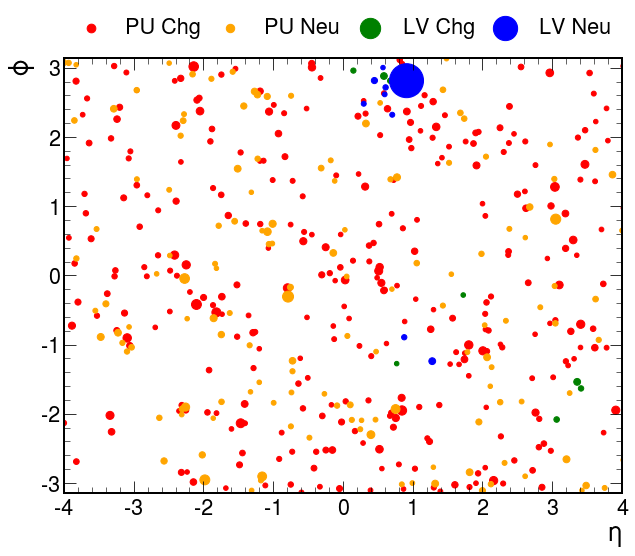

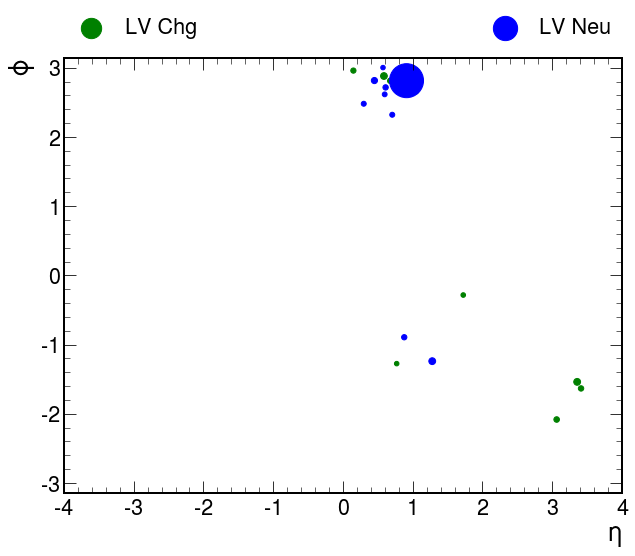

In [88]:
ievt = 20
event = particles[ievt]
# remove zero padded particles
event = event[(event[:, 4]>1.0) & (event[:,18]==0)]
event_LV_chg = (event[:, 7]!=0) & (event[:, 17]==0)
event_LV_neu = (event[:, 7]==0) & (event[:, 17]==0)
event_PU_chg = (event[:, 7]!=0) & (event[:, 17]!=0)
event_PU_neu = (event[:, 7]==0) & (event[:, 17]!=0)

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(event[event_PU_chg, 5],  event[event_PU_chg, 6],  s=event[event_PU_chg, 4]*20.0,   c='red', label='PU Chg')
ax.scatter(event[event_PU_neu, 5],  event[event_PU_neu, 6],  s=event[event_PU_neu, 4]*20.0,   c='orange', label='PU Neu')
ax.scatter(event[event_LV_chg, 5],  event[event_LV_chg, 6],  s=event[event_LV_chg, 4]*20.0,   c='green', label='LV Chg')
ax.scatter(event[event_LV_neu, 5],  event[event_LV_neu, 6],  s=event[event_LV_neu, 4]*20.0,   c='blue', label='LV Neu')
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
#ax.set_ylim(1.5, 2.5)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-4, 4)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
#ax.scatter(event[event_PU_chg, 5],  event[event_PU_chg, 6],  s=event[event_PU_chg, 4]*20.0,   c='red', label='PU Chg')
#ax.scatter(event[event_PU_neu, 5],  event[event_PU_neu, 6],  s=event[event_PU_neu, 4]*20.0,   c='orange', label='PU Neu')
ax.scatter(event[event_LV_chg, 5],  event[event_LV_chg, 6],  s=event[event_LV_chg, 4]*20.0,   c='green', label='LV Chg')
ax.scatter(event[event_LV_neu, 5],  event[event_LV_neu, 6],  s=event[event_LV_neu, 4]*20.0,   c='blue', label='LV Neu')
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
#ax.set_ylim(1.5, 2.5)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-4, 4)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

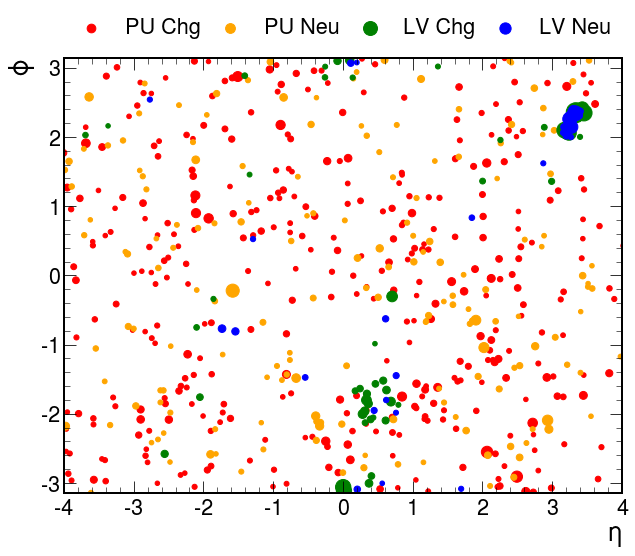

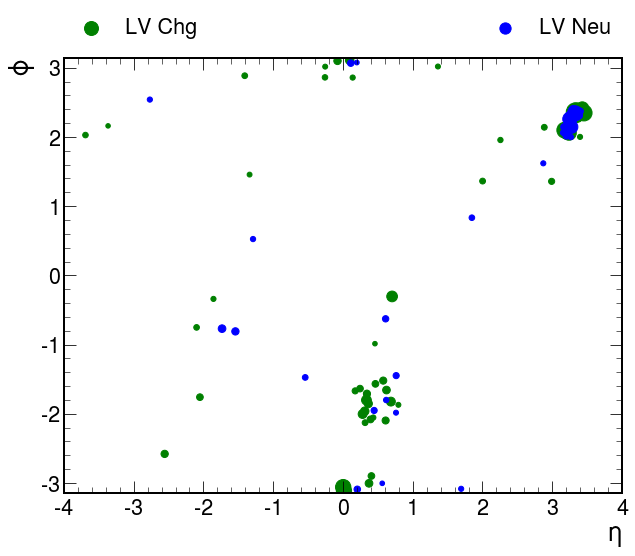

In [87]:
ievt = 40
event = particles[ievt]
# remove zero padded particles
event = event[(event[:, 4]>1.0) & (event[:,18]==0)]
event_LV_chg = (event[:, 7]!=0) & (event[:, 17]==0)
event_LV_neu = (event[:, 7]==0) & (event[:, 17]==0)
event_PU_chg = (event[:, 7]!=0) & (event[:, 17]!=0)
event_PU_neu = (event[:, 7]==0) & (event[:, 17]!=0)

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(event[event_PU_chg, 5],  event[event_PU_chg, 6],  s=event[event_PU_chg, 4]*20.0,   c='red', label='PU Chg')
ax.scatter(event[event_PU_neu, 5],  event[event_PU_neu, 6],  s=event[event_PU_neu, 4]*20.0,   c='orange', label='PU Neu')
ax.scatter(event[event_LV_chg, 5],  event[event_LV_chg, 6],  s=event[event_LV_chg, 4]*20.0,   c='green', label='LV Chg')
ax.scatter(event[event_LV_neu, 5],  event[event_LV_neu, 6],  s=event[event_LV_neu, 4]*20.0,   c='blue', label='LV Neu')
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
#ax.set_ylim(1.5, 2.5)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-4, 4)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
#ax.scatter(event[event_PU_chg, 5],  event[event_PU_chg, 6],  s=event[event_PU_chg, 4]*20.0,   c='red', label='PU Chg')
#ax.scatter(event[event_PU_neu, 5],  event[event_PU_neu, 6],  s=event[event_PU_neu, 4]*20.0,   c='orange', label='PU Neu')
ax.scatter(event[event_LV_chg, 5],  event[event_LV_chg, 6],  s=event[event_LV_chg, 4]*20.0,   c='green', label='LV Chg')
ax.scatter(event[event_LV_neu, 5],  event[event_LV_neu, 6],  s=event[event_LV_neu, 4]*20.0,   c='blue', label='LV Neu')
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
#ax.set_ylim(1.5, 2.5)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-4, 4)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

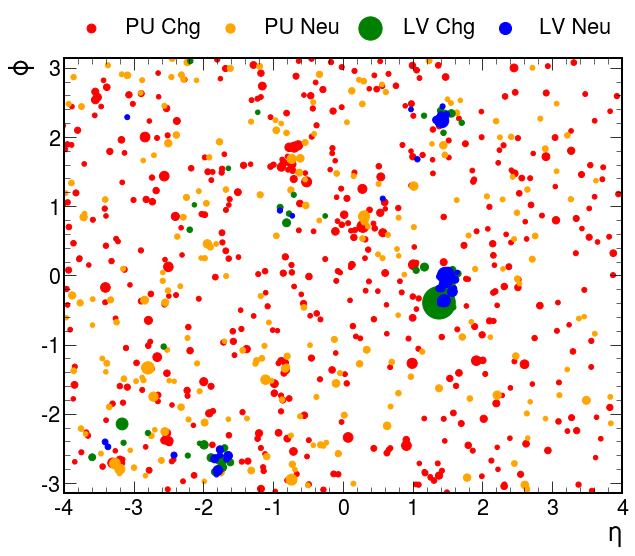

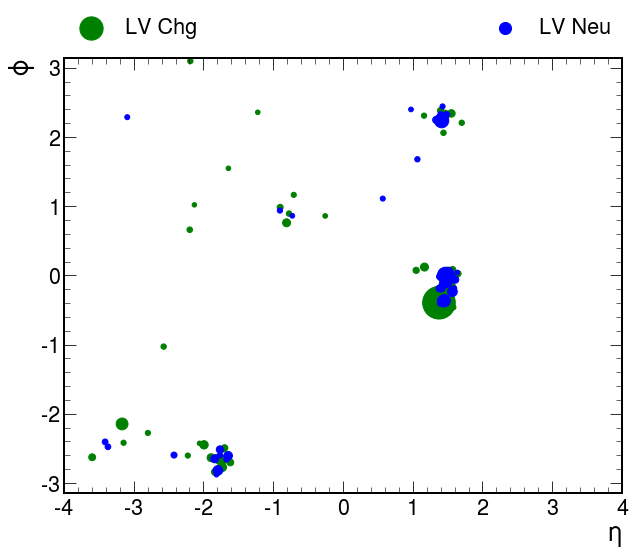

In [93]:
ievt = 90
event = particles[ievt]
# remove zero padded particles
event = event[(event[:, 4]>1.0) & (event[:,18]==0)]
event_LV_chg = (event[:, 7]!=0) & (event[:, 17]==0)
event_LV_neu = (event[:, 7]==0) & (event[:, 17]==0)
event_PU_chg = (event[:, 7]!=0) & (event[:, 17]!=0)
event_PU_neu = (event[:, 7]==0) & (event[:, 17]!=0)

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(event[event_PU_chg, 5],  event[event_PU_chg, 6],  s=event[event_PU_chg, 4]*20.0,   c='red', label='PU Chg')
ax.scatter(event[event_PU_neu, 5],  event[event_PU_neu, 6],  s=event[event_PU_neu, 4]*20.0,   c='orange', label='PU Neu')
ax.scatter(event[event_LV_chg, 5],  event[event_LV_chg, 6],  s=event[event_LV_chg, 4]*20.0,   c='green', label='LV Chg')
ax.scatter(event[event_LV_neu, 5],  event[event_LV_neu, 6],  s=event[event_LV_neu, 4]*20.0,   c='blue', label='LV Neu')
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
#ax.set_ylim(1.5, 2.5)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-4, 4)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
#ax.scatter(event[event_PU_chg, 5],  event[event_PU_chg, 6],  s=event[event_PU_chg, 4]*20.0,   c='red', label='PU Chg')
#ax.scatter(event[event_PU_neu, 5],  event[event_PU_neu, 6],  s=event[event_PU_neu, 4]*20.0,   c='orange', label='PU Neu')
ax.scatter(event[event_LV_chg, 5],  event[event_LV_chg, 6],  s=event[event_LV_chg, 4]*20.0,   c='green', label='LV Chg')
ax.scatter(event[event_LV_neu, 5],  event[event_LV_neu, 6],  s=event[event_LV_neu, 4]*20.0,   c='blue', label='LV Neu')
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
#ax.set_ylim(1.5, 2.5)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-4, 4)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()